# Binary CIFAR10 Label 3 and label 4 /  3->1 4->0 / 3 is positive 4 is negative CNN

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("/Users/max/MasterThesis/Training/"))

In [2]:
import torch
from torch.utils.data import DataLoader, Subset, ConcatDataset, TensorDataset
from torchvision import datasets, transforms
import numpy as np

# CIFAR10 数据归一化参数
# 数据预处理
cifar10_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])
# 加载 CIFAR10 数据集
full_train_dataset = datasets.CIFAR10(
    root="/Users/max/MasterThesisData/CIFAR10", train=True, transform=cifar10_transforms, download=True)
full_test_dataset = datasets.CIFAR10(
    root="/Users/max/MasterThesisData/CIFAR10", train=False, transform=cifar10_transforms, download=True)

# 筛选训练集中的标签 3 和 4，并映射标签（标签 3 -> 1，标签 4 -> 0）
indices3_train = [i for i in range(len(full_train_dataset)) if full_train_dataset.targets[i] == 3]
indices4_train = [i for i in range(len(full_train_dataset)) if full_train_dataset.targets[i] == 4]

# 筛选测试集中的标签 3 和 4，并映射标签
indices3_test = [i for i in range(len(full_test_dataset)) if full_test_dataset.targets[i] == 3]
indices4_test = [i for i in range(len(full_test_dataset)) if full_test_dataset.targets[i] == 4]

# 训练集：获取标签为 3 的数据（映射为 1）
cifar3_train_data = full_train_dataset.data[indices3_train]  # numpy 数组，形状 (n, 32, 32, 3)
cifar3_train_labels = torch.ones(len(indices3_train), dtype=torch.long)

# 训练集：获取标签为 4 的数据（映射为 0）
cifar4_train_data = full_train_dataset.data[indices4_train]
cifar4_train_labels = torch.zeros(len(indices4_train), dtype=torch.long)

# 测试集：获取标签为 3 的数据（映射为 1）
cifar3_test_data = full_test_dataset.data[indices3_test]
cifar3_test_labels = torch.ones(len(indices3_test), dtype=torch.long)

# 测试集：获取标签为 4 的数据（映射为 0）
cifar4_test_data = full_test_dataset.data[indices4_test]
cifar4_test_labels = torch.zeros(len(indices4_test), dtype=torch.long)

# 控制不平衡比例，比如这里设定为 0.005（即只选取标签 4 数据中的一小部分）
fraction = int(0.2 * len(cifar3_train_data))
selected_indices_4 = np.random.choice(len(cifar4_train_data), fraction, replace=False)
fraction_cifar4_train_data = cifar4_train_data[selected_indices_4]
fraction_cifar4_train_labels = cifar4_train_labels[selected_indices_4]

# 拼接最终的训练和测试数据集
Final_train_data = np.concatenate([cifar3_train_data, fraction_cifar4_train_data], axis=0)
Final_train_labels = torch.cat([cifar3_train_labels, fraction_cifar4_train_labels], dim=0)

Final_test_data = np.concatenate([cifar3_test_data, cifar4_test_data], axis=0)
Final_test_labels = torch.cat([cifar3_test_labels, cifar4_test_labels], dim=0)

# 将 numpy 数组转换为 tensor，并调整维度为 (N, C, H, W)
Final_train_data = torch.from_numpy(Final_train_data).permute(0, 3, 1, 2).float()
Final_test_data = torch.from_numpy(Final_test_data).permute(0, 3, 1, 2).float()

# 归一化图像数据：先除以 255，再进行标准化
# # 创建 TensorDataset
# Final_train_datasets = TensorDataset(Final_train_data.unsqueeze(3).float() / 255, Final_train_labels)
# Final_test_datasets = TensorDataset(Final_test_data.unsqueeze(3).float() / 255, Final_test_labels)

# 创建 TensorDataset
Final_train_dataset = TensorDataset(Final_train_data.float() / 255, Final_train_labels)
Final_test_dataset = TensorDataset(Final_test_data.float() / 255, Final_test_labels)

# 数据加载器
train_loader = DataLoader(Final_train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(Final_test_dataset, batch_size=64, shuffle=False)

# 打印数据信息
print("Number of label 1 in the final training set: ", len(cifar3_train_data))
print("Number of label 0 in the final training set (after downsampling): ", len(fraction_cifar4_train_data))
print("Number of label 1 in the final test set: ", len(cifar3_test_data))
print("Number of label 0 in the final test set: ", len(cifar4_test_data))

print("Total samples in final training set: ", len(Final_train_dataset))
print("Total samples in final test set: ", len(Final_test_dataset))

print("Number of batches in training set: ", len(train_loader))
print("Number of batches in test set: ", len(test_loader))


Number of label 1 in the final training set:  5000
Number of label 0 in the final training set (after downsampling):  1000
Number of label 1 in the final test set:  1000
Number of label 0 in the final test set:  1000
Total samples in final training set:  6000
Total samples in final test set:  2000
Number of batches in training set:  94
Number of batches in test set:  32


Images shape: torch.Size([64, 3, 32, 32])
Labels shape: torch.Size([64])


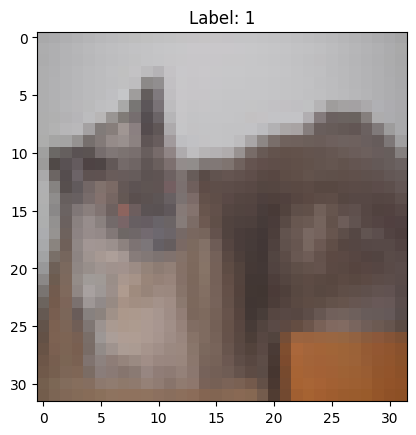

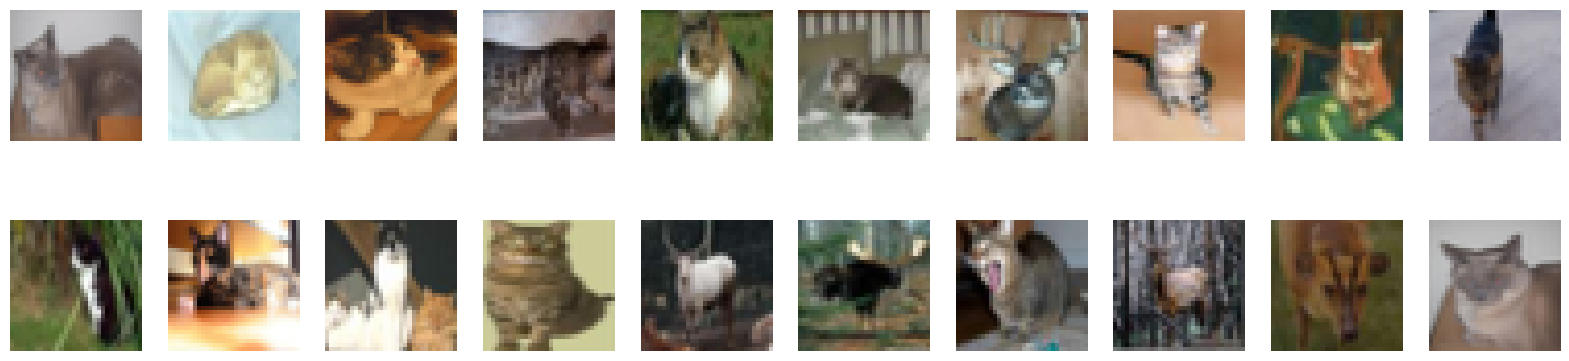

In [3]:

## 获取一个 batch
images, labels = next(iter(train_loader))

# 打印张量信息
print(f"Images shape: {images.shape}")  # (batch_size, 3, 32, 32)
print(f"Labels shape: {labels.shape}")

# 将第一张图像的维度转换为 (H, W, C) 并显示
img = images[0].permute(1, 2, 0).numpy()  # (32, 32, 3)
plt.imshow(img)  # 对于彩色图像，无需指定 cmap
plt.title(f"Label: {labels[0].item()}")
plt.show()

plt.figure(figsize=(20, 5))
for i, img_tensor in enumerate(images[:20]):
    # 将每张图像转换为 (H, W, C)
    npimg = img_tensor.permute(1, 2, 0).numpy()
    plt.subplot(2, 10, i+1)
    plt.imshow(npimg)  # 彩色图像，不指定 cmap
    plt.axis('off')
plt.show()


In [4]:
from torchinfo import summary
import torch
import torch.nn as nn
from CNN1 import BinaryCNN1
from CNN1 import BinaryCNN3
# 将模型转移到GPU中（我们模型运行均在GPU中进行）
model = BinaryCNN3().to(device)
summary(model)

Layer (type:depth-idx)                   Param #
BinaryCNN3                               --
├─Conv2d: 1-1                            896
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            18,496
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            147,520
├─Linear: 1-6                            130
Total params: 167,042
Trainable params: 167,042
Non-trainable params: 0

In [5]:
# define the optimizer and loss function
import torch.optim as optimizer
from self_metrics import Binary_got_metrics
loss_function = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optimizer.Adam(model.parameters(), lr=learning_rate)

# model training
def train(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss, train_accuracy = 0, 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        # Compute prediction error
        prediction = model(images)
        loss = loss_function(prediction, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_accuracy += (prediction.argmax(1) == labels).type(torch.float).sum().item()

    train_loss /= num_batches
    train_accuracy /= size

    return train_loss, train_accuracy



# model evaluation
def test(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, test_accuracy = 0, 0
    # 1(1) is positive, 0(7) is negative
    # TP: 1 classified as 1
    # TN: 0 classified as 0
    # FP: 0 classified as 1
    # FN: 1 classified as 0
    TP, TN, FP, FN = 0, 0, 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            prediction = model(images)
            test_loss += loss_function(prediction, labels).item()
            test_accuracy += (prediction.argmax(1) == labels).type(torch.float).sum().item()
            TP += ((prediction.argmax(1) == 1) & (labels == 1)).type(torch.float).sum().item()
            TN += ((prediction.argmax(1) == 0) & (labels == 0)).type(torch.float).sum().item()
            FP += ((prediction.argmax(1) == 1) & (labels == 0)).type(torch.float).sum().item()
            FN += ((prediction.argmax(1) == 0) & (labels == 1)).type(torch.float).sum().item()


    test_loss /= num_batches
    test_accuracy /= size
    return test_loss, test_accuracy, TP, TN, FP, FN

# training the model
epochs = 50
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

best_model_TP = 0
best_model_TN = 0
best_model_FP = 0
best_model_FN = 0
best_test_accuracy = 0.0 # for saving the best model
for epoch in range(epochs):
    model.train()
    train_loss, train_accuracy = train(train_loader, model, loss_function, optimizer)
    model.eval()
    test_loss, test_accuracy,TP, TN, FP, FN  = test(test_loader, model, loss_function)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)

    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}") 

    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_model_TP = TP
        best_model_TN = TN
        best_model_FP = FP
        best_model_FN = FN
        save_path = f"BinaryCIFAR1034_{fraction}.pth"
        torch.save(model.state_dict(), save_path)
        print(f"==> New best model saved at epoch {epoch+1} with Test Accuracy: {test_accuracy:.4f}")
        #print(f"==> TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
        Accuracy, misclassification_rate, Sensitivity, Specificity, Precision, Negative_Predictive_Value, Gmean, Fmean, DPower, F2measure, InvF_05, AGFmeasure, Balanced_Accuracy, MCCmeasure, Kappa, Youden_Index, LR_pos, LR_neg = Binary_got_metrics(best_model_TP, best_model_FP, best_model_FN, best_model_TN)
        # metrics_results_path = f"BinaryMNIST17_{fraction}_metrics_results.txt"
        # with open(metrics_results_path, "w") as f:
        #     print("Number of label 1 in the final training set: ", len(mnist1_train_data), file=f)
        #     print("Number of label 7 in the final training set (after downsampling): ", len(fraction_mnist7_train_data), file=f)
        #     print("Number of label 1 in the final test set: ", len(mnist1_test_data), file=f)
        #     print("Number of label 7 in the final test set: ", len(mnist7_test_data), file=f)

        #     print("Total samples in final training set: ", len(Final_train_datasets), file=f)
        #     print("Total samples in final test set: ", len(Final_test_datasets), file=f)

        #     print("Number of batches in training set: ", len(train_loader), file=f)
        #     print("Number of batches in test set: ", len(test_loader), file=f)
        #     print(f"TP: {TP}", file=f)
        #     print(f"FP: {FP}", file=f)
        #     print(f"FN: {FN}", file=f)
        #     print(f"TN: {TN}", file=f)
        #     print(f"Accuracy: {Accuracy:.4f}", file=f)
        #     print(f"Misclassification rate: {misclassification_rate:.4f}", file=f)
        #     print(f"Sensitivity (Recall): {Sensitivity:.4f}", file=f)
        #     print(f"Specificity: {Specificity:.4f}", file=f)
        #     print(f"Precision: {Precision:.4f}", file=f)
        #     print(f"Negative Predictive Value: {Negative_Predictive_Value:.4f}", file=f)
        #     print(f"G-mean: {Gmean:.4f}", file=f)
        #     print(f"F-measure: {Fmean:.4f}", file=f)
        #     print(f"Discriminant Power (DP): {DPower:.4f}", file=f)
        #     print(f"F2-measure: {F2measure:.4f}", file=f)
        #     print(f"InvF0.5-measure: {InvF_05:.4f}", file=f)
        #     print(f"AGF: {AGFmeasure:.4f}", file=f)
        #     print(f"Balanced Accuracy: {Balanced_Accuracy:.4f}", file=f)
        #     print(f"Matthew's Correlation Coefficient (MCC): {MCCmeasure:.4f}", file=f)
        #     print(f"Cohen's Kappa: {Kappa:.4f}", file=f)
        #     print(f"Youden's Index: {Youden_Index:.4f}", file=f)
        #     print(f"Positive Likelihood Ratio (LR+): {LR_pos:.4f}", file=f)
        #     print(f"Negative Likelihood Ratio (LR-): {LR_neg:.4f}", file=f)
        import json

        # 构造一个包含所有指标数据的字典
        metrics_dict = {
            "Number of label 3 in the final training set": len(cifar3_train_data),
            "Number of label 4 in the final training set (after downsampling)": len(fraction_cifar4_train_data),
            "Number of label 3 in the final test set": len(cifar3_test_data),
            "Number of label 4 in the final test set": len(cifar4_test_data),
            "Total samples in final training set": len(Final_train_dataset),
            "Total samples in final test set": len(Final_test_dataset),
            "Number of batches in training set": len(train_loader),
            "Number of batches in test set": len(test_loader),
            "TP": TP,
            "FP": FP,
            "FN": FN,
            "TN": TN,
            "Accuracy": round(Accuracy, 4),
            "Misclassification rate": round(misclassification_rate, 4),
            "Sensitivity (Recall)": round(Sensitivity, 4),
            "Specificity": round(Specificity, 4),
            "Precision": round(Precision, 4),
            "Negative Predictive Value": round(Negative_Predictive_Value, 4),
            "G-mean": round(Gmean, 4),
            "F-measure": round(Fmean, 4),
            "Discriminant Power (DP)": round(DPower, 4),
            "F2-measure": round(F2measure, 4),
            "InvF0.5-measure": round(InvF_05, 4),
            "AGF": round(AGFmeasure, 4),
            "Balanced Accuracy": round(Balanced_Accuracy, 4),
            "Matthew's Correlation Coefficient (MCC)": round(MCCmeasure, 4),
            "Cohen's Kappa": round(Kappa, 4),
            "Youden's Index": round(Youden_Index, 4),
            "Positive Likelihood Ratio (LR+)": round(LR_pos, 4),
            "Negative Likelihood Ratio (LR-)": round(LR_neg, 4)
        }

        # 指定 JSON 文件保存路径
        metrics_results_path = f"BinaryCIFAR1034_{fraction}_metrics_results.json"

        # 将字典保存为 JSON 文件
        with open(metrics_results_path, "w") as f:
            json.dump(metrics_dict, f, indent=4)

Epoch: 1/50, Train Loss: 0.4327, Train Accuracy: 0.8273, Test Loss: 1.0380, Test Accuracy: 0.5000
==> New best model saved at epoch 1 with Test Accuracy: 0.5000
TP: 1000.0
FP: 1000.0
FN: 0.0
TN: 0.0
Accuracy: 0.5000
Misclassification rate: 0.5000
Sensitivity (Recall): 1.0000
Specificity: 0.0000
Precision: 0.5000
Negative Predictive Value: inf
G-mean: 0.0000
F-measure: 0.6667
Discriminant Power: Infinity
F2-measure: 0.5556
InvF0.5-measure: 0.8333
AGF: 0.6804
Balanced Accuracy: 0.5000
Matthew's Correlation Coefficient: -999999999.0000
Cohen's Kappa: 0.0000
Youden's Index: 0.0000
Positive Likelihood Ratio: 1.0000
Negative Likelihood Ratio: -99999999.0000
Epoch: 2/50, Train Loss: 0.3678, Train Accuracy: 0.8438, Test Loss: 0.8833, Test Accuracy: 0.5715
==> New best model saved at epoch 2 with Test Accuracy: 0.5715
TP: 995.0
FP: 852.0
FN: 5.0
TN: 148.0
Accuracy: 0.5715
Misclassification rate: 0.4285
Sensitivity (Recall): 0.9950
Specificity: 0.1480
Precision: 0.5387
Negative Predictive Value: